# oywlitic

In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
username = ''
token = ''
datastream = 'anxaoscpcfM1.b1'
startdate = '2020-03-09'
enddate = '2020-03-15'

In [3]:
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] anxaoscpcfM1.b1.20200309.000000.nc
[DOWNLOADING] anxaoscpcfM1.b1.20200314.000000.nc
[DOWNLOADING] anxaoscpcfM1.b1.20200312.000000.nc
[DOWNLOADING] anxaoscpcfM1.b1.20200313.000000.nc
[DOWNLOADING] anxaoscpcfM1.b1.20200311.000000.nc
[DOWNLOADING] anxaoscpcfM1.b1.20200310.000000.nc

If you use these data to prepare a publication, please cite:

Koontz, A., Kuang, C., Andrews, E., Hayes, C., Singh, A., & Salwen, C.
Condensation Particle Counter (AOSCPCF). Atmospheric Radiation Measurement (ARM)
User Facility. https://doi.org/10.5439/1352536



In [4]:
ds_mpl = act.io.read_arm_netcdf(result)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [5]:
ds_mpl

<xarray.Dataset> Size: 48MB
Dimensions:            (time: 518397)
Coordinates:
  * time               (time) datetime64[ns] 4MB 2020-03-09T00:00:00.670000 ....
Data variables: (12/18)
    base_time          (time) datetime64[ns] 4MB 2020-03-09 ... 2020-03-14
    time_offset        (time) datetime64[ns] 4MB 2020-03-09T00:00:00.670000 ....
    concentration      (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    qc_concentration   (time) int32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    saturation_temp    (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    condensation_temp  (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    ...                 ...
    liquid_level       (time) float64 4MB dask.array<chunksize=(86399,), meta=np.ndarray>
    fraction_full      (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    corrected_flow     (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    lat                (time) float32 2MB 69.14 69.14 69.14 ... 69.14 69.14
    lon                (time) float32 2MB 15.68 15.68 15.68 ... 15.68 15.68
    alt                (time) float32 2MB 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
Attributes: (12/25)
    command_line:                aoscpcfcorr -s anx -f M1 -DR
    Conventions:                 ARM-1.2
    process_version:             ingest-aoscpcfcorr-2.4-0.el7
    dod_version:                 aoscpcf-b1-4.0
    site_id:                     anx
    platform_id:                 aoscpcf
    ...                          ...
    doi:                         10.5439/1352536
    history:                     created by user dsmgr on machine flint at 20...
    _file_dates:                 ['20200309', '20200310', '20200311', '202003...
    _file_times:                 ['000000', '000000', '000000', '000000', '00...
    _datastream:                 anxaoscpcfM1.b1
    _arm_standards_flag:         1

In [6]:
variable = ds_mpl['concentration']

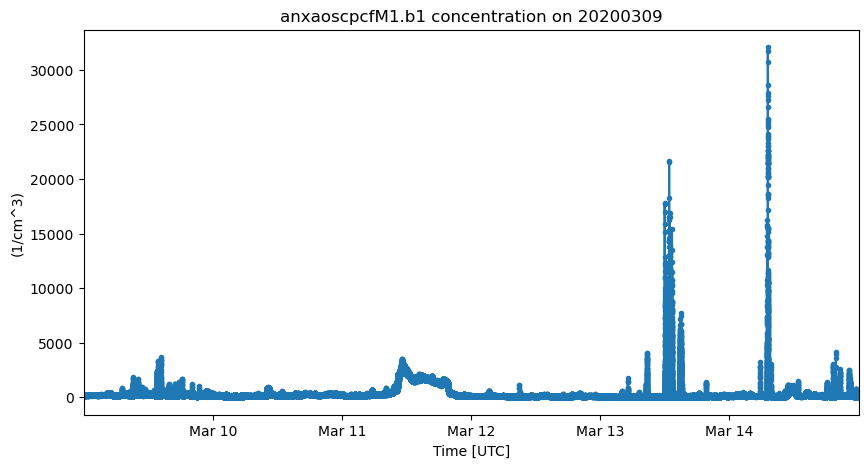

In [7]:
#ds_mpl = act.corrections.correct_mpl(ds_mpl)
display = act.plotting.TimeSeriesDisplay(ds_mpl, figsize=(10, 5), subplot_shape=(1,))
display.plot('concentration', subplot_index=(0,))
plt.show()


In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
username = 'oyelistic'
token = '7214d9f57d85576a'
datastream = 'anxaoscpcfM1.b1'
startdate = '2020-03-13'
enddate = '2020-03-14'

In [ ]:
'anxaosccn2colaspectraM1.b1'

In [6]:
username = 'oyelistic'
token = '7214d9f57d85576a'
datastream = 'anxaosccn2colaspectraM1.b1'
startdate = '2019-12-01'
enddate = '2020-06-01'

In [7]:
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] anxaosccn2colaspectraM1.b1.20200529.012906.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20200531.005613.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20200530.003610.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20191201.005946.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20191203.002655.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20191205.033303.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20191207.012411.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20191209.000118.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20191217.013819.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20191204.004744.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20191206.024034.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20191202.011950.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20191208.005414.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20200125.010028.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20200126.012039.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1.20200124.004024.nc
[DOWNLOADING] anxaosccn2colaspectraM1.b1

In [8]:
ds_mpl = act.io.read_arm_netcdf(result)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [9]:
ds_mpl = act.io.read_arm_netcdf(result)

In [16]:
ds_mpl

<xarray.Dataset> Size: 755kB
Dimensions:                     (time: 2194, bound: 2,
                                 supersaturation_setpoint: 7,
                                 polynomial_order: 3)
Coordinates:
  * time                        (time) datetime64[ns] 18kB 2019-12-01T00:59:4...
  * supersaturation_setpoint    (supersaturation_setpoint) float32 28B 0.0 .....
Dimensions without coordinates: bound, polynomial_order
Data variables: (12/16)
    base_time                   (time) datetime64[ns] 18kB 2019-12-01 ... 202...
    time_offset                 (time) datetime64[ns] 18kB 2019-12-01T00:59:4...
    time_bounds                 (time, bound) object 35kB dask.array<chunksize=(15, 2), meta=np.ndarray>
    setpoint_time               (time, supersaturation_setpoint) float64 123kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    supersaturation_calculated  (time, supersaturation_setpoint) float32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    N_CCN                       (time, supersaturation_setpoint) float32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    ...                          ...
    concentration               (time, supersaturation_setpoint) float32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    f_CCN                       (time, supersaturation_setpoint) float32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    qc_f_CCN                    (time, supersaturation_setpoint) int32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    lat                         (time) float32 9kB 69.14 69.14 ... 69.14 69.14
    lon                         (time) float32 9kB 15.68 15.68 ... 15.68 15.68
    alt                         (time) float32 9kB 2.0 2.0 2.0 ... 2.0 2.0 2.0
Attributes: (12/23)
    command_line:             aosccn200corr -s anx -f M1 -D
    Conventions:              ARM-1.2
    process_version:          ingest-aosccn200corr-2.1-3.el7
    dod_version:              aosccn2colaspectra-b1-1.2
    site_id:                  anx
    facility_id:              M1
    ...                       ...
    doi:                      10.5439/1323896
    history:                  created by user dsmgr on machine flint at 2020-...
    _file_dates:              ['20191201', '20191202', '20191203', '20191204'...
    _file_times:              ['005946', '011950', '002655', '004744', '03330...
    _datastream:              anxaosccn2colaspectraM1.b1
    _arm_standards_flag:      1

In [17]:
ds_mpl.clean.cleanup()

In [19]:
ds_mpl

<xarray.Dataset> Size: 755kB
Dimensions:                     (time: 2194, bound: 2,
                                 supersaturation_setpoint: 7,
                                 polynomial_order: 3)
Coordinates:
  * time                        (time) datetime64[ns] 18kB 2019-12-01T00:59:4...
  * supersaturation_setpoint    (supersaturation_setpoint) float32 28B 0.0 .....
Dimensions without coordinates: bound, polynomial_order
Data variables: (12/16)
    base_time                   (time) datetime64[ns] 18kB 2019-12-01 ... 202...
    time_offset                 (time) datetime64[ns] 18kB 2019-12-01T00:59:4...
    time_bounds                 (time, bound) object 35kB dask.array<chunksize=(15, 2), meta=np.ndarray>
    setpoint_time               (time, supersaturation_setpoint) float64 123kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    supersaturation_calculated  (time, supersaturation_setpoint) float32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    N_CCN                       (time, supersaturation_setpoint) float32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    ...                          ...
    concentration               (time, supersaturation_setpoint) float32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    f_CCN                       (time, supersaturation_setpoint) float32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    qc_f_CCN                    (time, supersaturation_setpoint) int32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    lat                         (time) float32 9kB 69.14 69.14 ... 69.14 69.14
    lon                         (time) float32 9kB 15.68 15.68 ... 15.68 15.68
    alt                         (time) float32 9kB 2.0 2.0 2.0 ... 2.0 2.0 2.0
Attributes: (12/23)
    command_line:             aosccn200corr -s anx -f M1 -D
    Conventions:              ARM-1.2
    process_version:          ingest-aosccn200corr-2.1-3.el7
    dod_version:              aosccn2colaspectra-b1-1.2
    site_id:                  anx
    facility_id:              M1
    ...                       ...
    doi:                      10.5439/1323896
    history:                  created by user dsmgr on machine flint at 2020-...
    _file_dates:              ['20191201', '20191202', '20191203', '20191204'...
    _file_times:              ['005946', '011950', '002655', '004744', '03330...
    _datastream:              anxaosccn2colaspectraM1.b1
    _arm_standards_flag:      1

In [37]:
NSA = ds_mpl.resample(time='1H').mean()

<string>:6: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.


In [ ]:
ds_mpl = act.corrections.correct_mpl(ds_mpl)

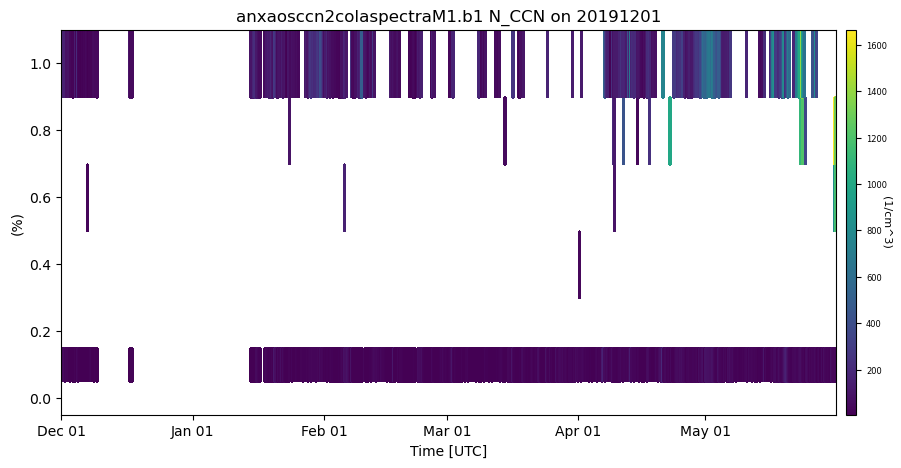

In [38]:
display = act.plotting.TimeSeriesDisplay(NSA, figsize=(10, 5), subplot_shape=(1,))

display.plot('N_CCN', subplot_index=(0,))
plt.show()

In [36]:
ds_mpl


<xarray.Dataset> Size: 755kB
Dimensions:                     (time: 2194, bound: 2,
                                 supersaturation_setpoint: 7,
                                 polynomial_order: 3)
Coordinates:
  * time                        (time) datetime64[ns] 18kB 2019-12-01T00:59:4...
  * supersaturation_setpoint    (supersaturation_setpoint) float32 28B 0.0 .....
Dimensions without coordinates: bound, polynomial_order
Data variables: (12/16)
    base_time                   (time) datetime64[ns] 18kB 2019-12-01 ... 202...
    time_offset                 (time) datetime64[ns] 18kB 2019-12-01T00:59:4...
    time_bounds                 (time, bound) object 35kB dask.array<chunksize=(15, 2), meta=np.ndarray>
    setpoint_time               (time, supersaturation_setpoint) float64 123kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    supersaturation_calculated  (time, supersaturation_setpoint) float32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    N_CCN                       (time, supersaturation_setpoint) float32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    ...                          ...
    concentration               (time, supersaturation_setpoint) float32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    f_CCN                       (time, supersaturation_setpoint) float32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    qc_f_CCN                    (time, supersaturation_setpoint) int32 61kB dask.array<chunksize=(15, 7), meta=np.ndarray>
    lat                         (time) float32 9kB 69.14 69.14 ... 69.14 69.14
    lon                         (time) float32 9kB 15.68 15.68 ... 15.68 15.68
    alt                         (time) float32 9kB 2.0 2.0 2.0 ... 2.0 2.0 2.0
Attributes: (12/23)
    command_line:             aosccn200corr -s anx -f M1 -D
    Conventions:              ARM-1.2
    process_version:          ingest-aosccn200corr-2.1-3.el7
    dod_version:              aosccn2colaspectra-b1-1.2
    site_id:                  anx
    facility_id:              M1
    ...                       ...
    doi:                      10.5439/1323896
    history:                  created by user dsmgr on machine flint at 2020-...
    _file_dates:              ['20191201', '20191202', '20191203', '20191204'...
    _file_times:              ['005946', '011950', '002655', '004744', '03330...
    _datastream:              anxaosccn2colaspectraM1.b1
    _arm_standards_flag:      1